In [1]:
import sys
import pathlib
import numpy as np
import matplotlib.pyplot as plt

#get path of this notebook

current_path = pathlib.Path().absolute()
print(current_path)

#Para que lea de otras carpetas
sys.path.append(str(current_path / '../prepare_data'))
sys.path.append(str(current_path / '../datasets'))
sys.path.append(str(current_path / '../func_pruebas_lucia'))

ddsm_dir = pathlib.Path('/home/Data/mamo/DDSM_png')
dcm_images = list(ddsm_dir.glob('**/*.png'))
print(dcm_images[:10])
len(dcm_images)

/home/lloprib/proyecto_mam/Mammography/Yolo8Mamo/pruebas_lucia
[PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case3425/B_3425_1.LEFT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case3425/B_3425_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case3425/B_3425_1.RIGHT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case3425/B_3425_1.LEFT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0372/C_0372_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0372/C_0372_1.RIGHT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0372/C_0372_1.LEFT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0372/C_0372_1.LEFT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0370/C_0370_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/benigns/benign_06/case0370/C_0370_1.LEFT_CC.png')]


10420

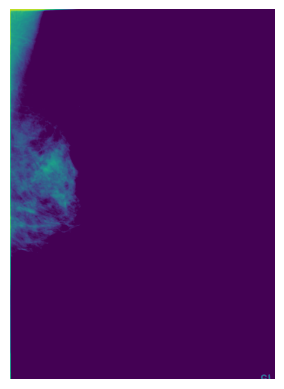

/home/Data/mamo/DDSM_png/benigns/benign_06/case0372/C_0372_1.LEFT_MLO.png


In [2]:
#Leer una imagen
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(dcm_images[7])

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Quitar ejes
plt.show()

print(dcm_images[7])

In [3]:
#Intentamos identificar un caso maligno 

dcm_cancer = list(ddsm_dir.glob('cancers/**/*.png'))
print(dcm_cancer[:10])

[PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.RIGHT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.LEFT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.LEFT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.LEFT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.LEFT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.RIGHT_CC.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case0002/C_0002_1.RIGHT_MLO.png'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case0002/C_0002_1.RIGHT_CC.png')]


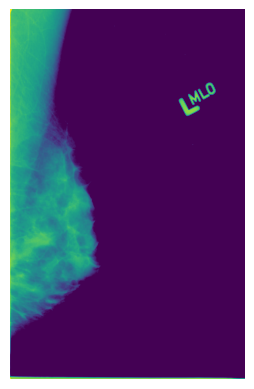

/home/Data/mamo/DDSM_png/cancers/cancer_01/case3008/B_3008_1.LEFT_MLO.png


In [4]:
img_cancer = mpimg.imread(dcm_cancer[80])

# Mostrar la imagen
plt.imshow(img_cancer)
plt.axis('off')  # Quitar ejes
plt.show()

print(dcm_cancer[80])


In [5]:
# Intentamos identificar algunas regiones con "Overlay"

dcm_overlay = list(ddsm_dir.glob('cancers/**/*.OVERLAY')) #Listamos los overlays
print(dcm_overlay[:10])
len(dcm_overlay)


[PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.RIGHT_CC.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3083/B_3083_1.RIGHT_MLO.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.RIGHT_MLO.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3003/B_3003_1.RIGHT_CC.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case0002/C_0002_1.LEFT_MLO.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case0002/C_0002_1.LEFT_CC.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3032/B_3032_1.LEFT_MLO.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3025/B_3025_1.RIGHT_MLO.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3025/B_3025_1.RIGHT_CC.OVERLAY'), PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3019/B_3019_1.LEFT_CC.OVERLAY')]


1900

In [6]:
#Para poder representar la silueta de los overlays:
from annotation_utils import read_overlay, get_outline_curve

print("reading overlay: ", dcm_overlay[7])
overlay = read_overlay(str(dcm_overlay[7]))

print(overlay)
#total #abormalities, #oulines in each abnormality, abnormality (see bellow)



reading overlay:  /home/Data/mamo/DDSM_png/cancers/cancer_01/case3025/B_3025_1.RIGHT_MLO.OVERLAY
(4, [1, 1, 1, 1], [('MASS', 5, 5, 'MALIGNANT', [[4080, 1896, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [7]:
abnormalities  = list(overlay[2])
print(len(abnormalities))
#l_type,ass,subt,patho,outlines

abnormalities[1]


4


('CALCIFICATION',
 5,
 5,
 'MALIGNANT',
 [[3816,
   2352,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   5,
   5,
   5,
   5,
   5,
   5,
   5,
   5,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   5,
   5,
   5,
   5,
   5,
   5,
   5,
   5,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   3,
   4,
   3,
   4,
   3,
   4,
   3,
   4,
   3,
   4,
   3,
   4,
   3,
   4,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,


[4080, 1896, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 

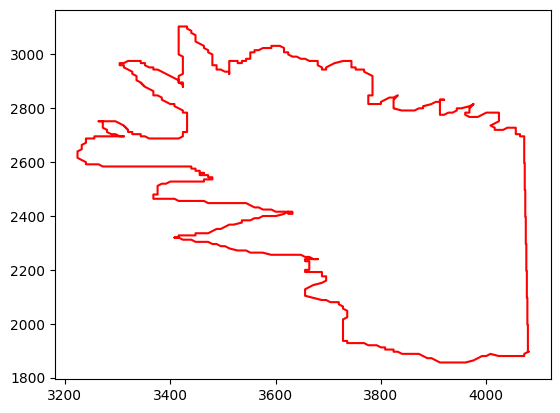

In [ ]:
chain_outline = list(abnormalities[0][4][0])
print(chain_outline)

outline = get_outline_curve(chain_outline)

plt.plot(outline[0], outline[1], 'r')


In [9]:
#Intentar representar el contorno y la imagen a la vez
dcm_overlay[7]


PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3025/B_3025_1.RIGHT_MLO.OVERLAY')

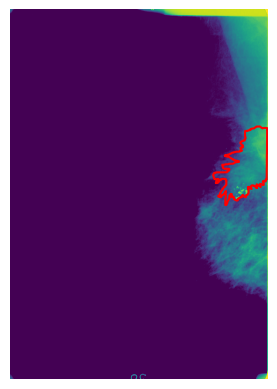

In [10]:
img_cancer2 = mpimg.imread('/home/Data/mamo/DDSM_png/cancers/cancer_01/case3025/B_3025_1.RIGHT_MLO.png')

# Mostrar la imagen
plt.imshow(img_cancer2)
plt.axis('off')  # Quitar ejes
plt.plot(outline[0], outline[1], 'r')
plt.show()


In [11]:
# Prueba para otro caso
print("reading overlay: ", dcm_overlay[182])
overlay = read_overlay(str(dcm_overlay[182]))

print(overlay)
#total #abormalities, #oulines in each abnormality, abnormality (see bellow)
abnormalities  = list(overlay[2])
print(len(abnormalities))
#l_type,ass,subt,patho,outlines

abnormalities[0]


reading overlay:  /home/Data/mamo/DDSM_png/cancers/cancer_12/case4128/D_4128_1.LEFT_CC.OVERLAY
(1, [1], [('MASS', 3, 4, 'MALIGNANT', [[1190, 3083, 6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

('MASS',
 3,
 4,
 'MALIGNANT',
 [[1190,
   3083,
   6,
   6,
   6,
   6,
   4,
   4,
   4,
   4,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   5,
   5,
   5,
   5,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   5,
   5,
   5,
   5,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   4,
   4,
   4,
   4,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   5,
   5,
   5,
   5,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   

[1190, 3083, 6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 

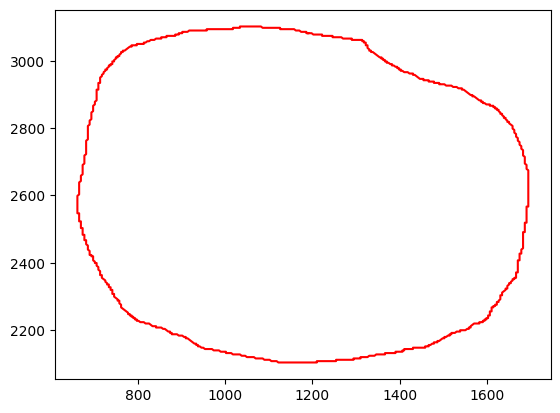

In [ ]:
chain_outline = list(abnormalities[0][4][0])
print(chain_outline)

outline = get_outline_curve(chain_outline)

plt.plot(outline[0], outline[1], 'r')


In [13]:
#Intentar representar el contorno y la imagen a la vez
dcm_overlay[182]

PosixPath('/home/Data/mamo/DDSM_png/cancers/cancer_12/case4128/D_4128_1.LEFT_CC.OVERLAY')

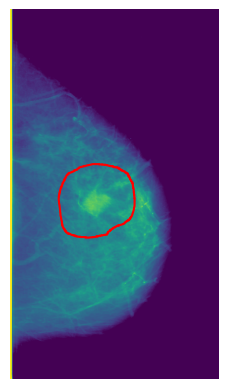

In [14]:
img_cancer3 = mpimg.imread('/home/Data/mamo/DDSM_png/cancers/cancer_12/case4128/D_4128_1.LEFT_CC.png')

# Mostrar la imagen
plt.imshow(img_cancer3)
plt.axis('off')  # Quitar ejes
plt.plot(outline[0], outline[1], 'r')
plt.show()


In [15]:
outline[0]
outline[1]

# En outline[0] están las coordenadas de x y en outline[1] las de y. Quiero el máximo y el mínimo de cada uno de los ejes
# En outline[0] están las coordenadas de x y en outline[1] las de y. Quiero el máximo y el mínimo de cada uno de los ejes

maxx = max(outline[0])
minx = min(outline[0])
maxy = max(outline[1])
miny = min(outline[1])

print(f"Max x: {maxx}, Min x: {minx}")
print(f"Max y: {maxy}, Min y: {miny}")


Max x: 1694, Min x: 662
Max y: 3103, Min y: 2103


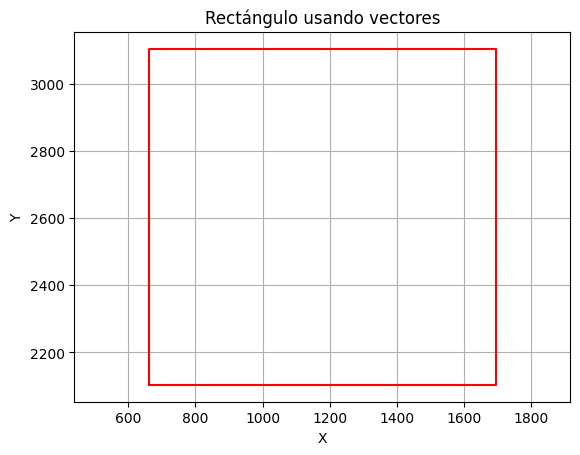

In [16]:

lado1 = np.array([maxx-minx, 0])  # Vector para el ancho (horizontal)
lado2 = np.array([0, maxy-miny])  # Vector para la altura (vertical)
origen = np.array([minx, miny])  # Origen del rectángulo

# Calcular las otras tres esquinas del rectángulo
esquina1 = origen
esquina2 = origen + lado1
esquina3 = origen + lado1 + lado2
esquina4 = origen + lado2

# Crear las coordenadas x e y de las esquinas en el orden correcto para formar el rectángulo
x_values = [esquina1[0], esquina2[0], esquina3[0], esquina4[0], esquina1[0]]
y_values = [esquina1[1], esquina2[1], esquina3[1], esquina4[1], esquina1[1]]

# Dibujar el rectángulo
plt.plot(x_values, y_values, 'r-')  

# Etiquetas y mostrar el gráfico
plt.title('Rectángulo usando vectores')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Para asegurar que los ejes tengan la misma escala
plt.show()


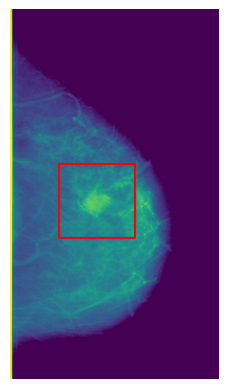

In [17]:
# Representar la imagen con el rctángulo

plt.imshow(img_cancer3)
plt.axis('off')  # Quitar ejes
plt.plot(x_values, y_values, 'r-')
plt.show()
